In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
from matplotlib import pylab
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../Data/City_MedianListingPrice_AllHomes.csv')
df=df.set_index('SizeRank')
df.head()

,RegionName,State,Metro,CountyName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
SizeRank,,,,,,,,,,,,,,,,,,,,,
1,New York,NY,New York,Queens,NaN,NaN,NaN,NaN,NaN,NaN,...,709000.0,715000.0,718800.0,699000.0,699000.0,716000.0,725000.0,719000.0,715000.0,735000.0
2,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,...,690000.0,699000.0,699000.0,699000.0,699000.0,699000.0,709000.0,699900.0,704000.0,708950.0
3,Chicago,IL,Chicago,Cook,NaN,NaN,NaN,NaN,NaN,NaN,...,275000.0,275000.0,270000.0,269000.0,270000.0,269900.0,265000.0,250000.0,255000.0,275000.0
4,Houston,TX,Houston,Harris,NaN,NaN,NaN,NaN,NaN,NaN,...,329900.0,330000.0,329000.0,329000.0,323990.0,317375.0,315000.0,309995.0,301990.0,309900.0
5,Philadelphia,PA,Philadelphia,Philadelphia,NaN,NaN,NaN,NaN,NaN,NaN,...,159900.0,159900.0,156900.0,150000.0,152000.0,158950.0,150000.0,149900.0,150000.0,150000.0


In [3]:
#total change from 2010-01 to 2017-02
df['Total Change'] = df.loc[:,'2017-02'] - df.loc[:,'2010-01']
df['Percent Change'] = (df.loc[:,'2017-02'] - df.loc[:,'2010-01']) / df.loc[:,'2010-01']
#Last one year change starting from 2016-02 to 2017-02
df['Year Change'] = df.loc[:,'2017-02'] - df.loc[:,'2016-02']
df['Year Percent Change'] = (df.loc[:,'2017-02'] - df.loc[:,'2016-02']) / df.loc[:,'2016-02']

In [28]:
df = df.fillna(0)
df.head()

,RegionName,State,Metro,CountyName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,Total Change,Percent Change,Year Change,Year Percent Change
SizeRank,,,,,,,,,,,,,,,,,,,,,
1,New York,NY,New York,Queens,0.0,0.0,0.0,0.0,0.0,0.0,...,699000.0,716000.0,725000.0,719000.0,715000.0,735000.0,0.0,0.0,-14000.0,-0.018692
2,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,0.0,0.0,0.0,0.0,0.0,0.0,...,699000.0,699000.0,709000.0,699900.0,704000.0,708950.0,0.0,0.0,43950.0,0.066090
3,Chicago,IL,Chicago,Cook,0.0,0.0,0.0,0.0,0.0,0.0,...,270000.0,269900.0,265000.0,250000.0,255000.0,275000.0,0.0,0.0,26000.0,0.104418
4,Houston,TX,Houston,Harris,0.0,0.0,0.0,0.0,0.0,0.0,...,323990.0,317375.0,315000.0,309995.0,301990.0,309900.0,0.0,0.0,-20000.0,-0.060624
5,Philadelphia,PA,Philadelphia,Philadelphia,0.0,0.0,0.0,0.0,0.0,0.0,...,152000.0,158950.0,150000.0,149900.0,150000.0,150000.0,0.0,0.0,10100.0,0.072194


In [31]:
df.groupby('RegionName')['Total Change'].mean()

RegionName
Abbeville          0.0
Aberdeen       13612.5
Abilene         3650.0
Abingdon       -9919.5
Abington       43994.5
                ...   
Zelienople         0.0
Zephyr Cove        0.0
Zephyrhills        0.0
Zion               0.0
Zionsville     93000.0
Name: Total Change, Length: 5769, dtype: float64

In [33]:
norm.fit(df['Total Change']) #mean and standard deviation

(11334.229183898538, 46725.43252530648)

In [34]:
def plotr(df, group, column='Total Change', bins=100):
    plot = df.groupby(group)[column].mean().plot(kind='hist', bins=bins)
    
    plt.title('Mean {} Grouped by {}'.format(column, group))
    plt.xlabel(column)
    plt.ylabel('Numer of Occurrences')
    
    mn = df[column].mean()
    plt.axvline(mn, color='r', linestyle='dashed', linewidth=1, label='mean')
    plt.legend()
    return plot

<AxesSubplot:title={'center':'Mean Total Change Grouped by RegionName'}, xlabel='Total Change', ylabel='Numer of Occurrences'>

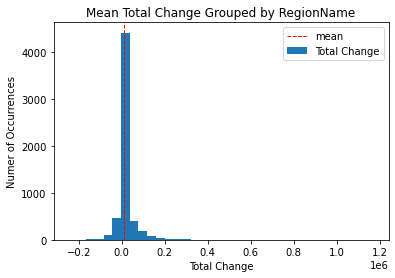

In [35]:
plotr(df,'RegionName',bins=35)

<AxesSubplot:title={'center':'Mean Total Change Grouped by Metro'}, xlabel='Total Change', ylabel='Numer of Occurrences'>

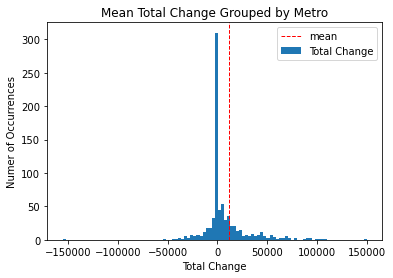

In [36]:
plotr(df,'Metro')

<AxesSubplot:title={'center':'Mean Total Change Grouped by State'}, xlabel='Total Change', ylabel='Numer of Occurrences'>

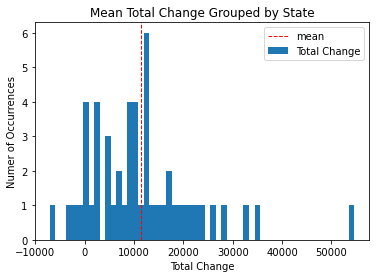

In [37]:
plotr(df,'State',bins=55)